### Note:  to start Jupyter Notebook with Spark, use the following command from the hadoop directory in terminal:

pyspark --packages org.diana-hep:spark-root_2.11:0.1.11,org.diana-hep:histogrammar-bokeh_2.11:1.0.3,org.diana-hep:histogrammar-sparksql_2.11:1.0.3

# Root file to Spark Dataframe

Below is the code to read in the root file into a Spark DataFrame.

The show() method can show some of the data in table format

The printSchema() can show the tree structure of the data

count() will display the number of rows

In [1]:
import time
start_time = time.time()

In [2]:
df = sqlContext.read.format("org.dianahep.sparkroot").load("file:/home/ethan/Documents/JL_Summer_2017/Root/data_05_53591_53591_03.root")

In [3]:
#df.show()

In [4]:
#df.printSchema()

In [5]:
df.count()

50000

# Importing Packages

In [6]:
from math import *
import numpy as np
from pyspark.sql import Row
import matplotlib.pyplot as plt
import histogrammar as hist
import ROOT

Welcome to JupyROOT 6.08/06


# Selecting a subset of the data

In [7]:
selection = df.select("Emprob","Trk_charge","Emcalene","Emth")
trk_charge = df.select("Trk_charge")
#emcalene = df.select("Emcalene")
#theta = df.select("Emth")
selection.printSchema()

root
 |-- Emprob: array (nullable = true)
 |    |-- element: float (containsNull = true)
 |-- Trk_charge: array (nullable = true)
 |    |-- element: float (containsNull = true)
 |-- Emcalene: array (nullable = true)
 |    |-- element: float (containsNull = true)
 |-- Emth: array (nullable = true)
 |    |-- element: float (containsNull = true)



Somehow it appears that the columns are getting mixed up...at least in the section.show() command.

However, when calling to show the specific columns, it appears that they are referenced correctly.

In [8]:
selection.show()
#emprob.show()
trk_charge.show()
#emcalene.show()
#theta.show()

+--------------------+--------------------+--------------------+--------------------+
|              Emprob|          Trk_charge|            Emcalene|                Emth|
+--------------------+--------------------+--------------------+--------------------+
|[0.08723083, 0.25...|[16.42564, 5.8450...|[3.036166, 0.2000...|[1.0, 1.0, 1.0, 1...|
|[0.939351, 0.2585...|[5.1453853, 4.929...|[3.018555, 0.0571...|[1.0, 1.0, -1.0, ...|
|[0.037284255, 0.0...|[19.95356, 4.6684...|[3.052607, 0.0831...|[-1.0, 1.0, 1.0, ...|
|        [0.55371076]|         [6.7391124]|         [3.0720887]|[1.0, -1.0, 1.0, ...|
|                  []|                  []|                  []|[-1.0, 1.0, 1.0, ...|
|[0.48681435, 0.00...|[7.0863314, 5.864...|[2.9617953, 0.145...|[-1.0, 1.0, 1.0, ...|
|        [0.92922276]|          [27.94636]|         [2.9795275]|[1.0, -1.0, -1.0,...|
|                  []|                  []|                  []|[1.0, 1.0, 1.0, -...|
|[0.93522364, 0.02...|[22.427814, 4.715...|[3.0406399,

In [9]:
selection

DataFrame[Emprob: array<float>, Trk_charge: array<float>, Emcalene: array<float>, Emth: array<float>]

In [10]:
selection.select("Trk_Charge").show()
selection.select("Emprob").show()
selection.select("Emcalene").show()
selection.select("Emth").show()

+--------------------+
|          Trk_Charge|
+--------------------+
|[1.0, 1.0, 1.0, 1...|
|[1.0, 1.0, -1.0, ...|
|[-1.0, 1.0, 1.0, ...|
|[1.0, -1.0, 1.0, ...|
|[-1.0, 1.0, 1.0, ...|
|[-1.0, 1.0, 1.0, ...|
|[1.0, -1.0, -1.0,...|
|[1.0, 1.0, 1.0, -...|
|[1.0, -1.0, -1.0,...|
|[-1.0, 1.0, 1.0, ...|
|[1.0, -1.0, -1.0,...|
|[-1.0, 1.0, 1.0, ...|
|               [1.0]|
|[-1.0, 1.0, 1.0, ...|
|[1.0, 1.0, 1.0, -...|
|[-1.0, 1.0, 1.0, ...|
|    [1.0, 1.0, -1.0]|
|[1.0, 1.0, -1.0, ...|
|[1.0, 1.0, -1.0, ...|
|                  []|
+--------------------+
only showing top 20 rows

+--------------------+
|              Emprob|
+--------------------+
|[0.08723083, 0.25...|
|[0.939351, 0.2585...|
|[0.037284255, 0.0...|
|        [0.55371076]|
|                  []|
|[0.48681435, 0.00...|
|        [0.92922276]|
|                  []|
|[0.93522364, 0.02...|
|         [0.9350373]|
|       [3.645794E-5]|
|         [0.3580788]|
|[0.73354083, 0.43...|
|        [0.06654061]|
|                  []|
|       

# Creating some basic Histograms

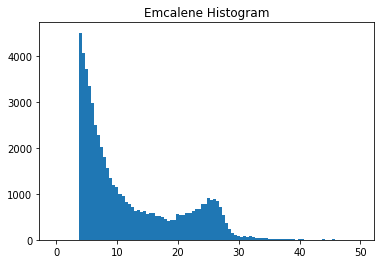

In [11]:
emcalene_rdd = selection.select("Emcalene").rdd
empty = hist.Bin(100, 0, 50, lambda x: x)
filled = emcalene_rdd.flatMap(lambda row: row[0]).aggregate(empty, hist.increment, hist.combine)
%matplotlib inline
filled.plot.matplotlib(name="Emcalene Histogram")

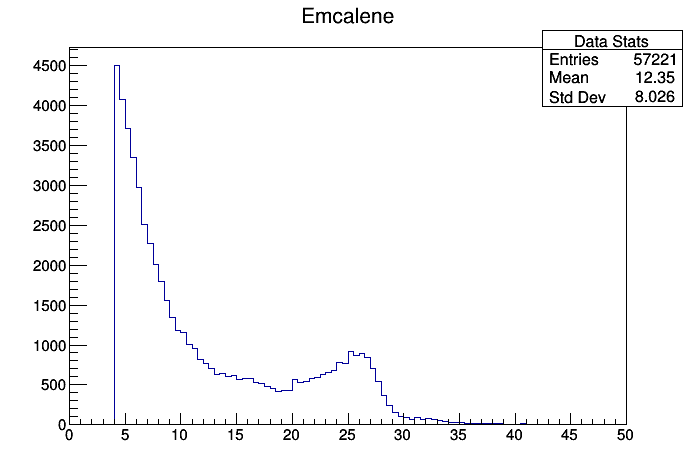

In [12]:
histogram = filled.plot.root("Data Stats", "Emcalene")
c = ROOT.TCanvas("c")
histogram.Draw()
c.Draw()

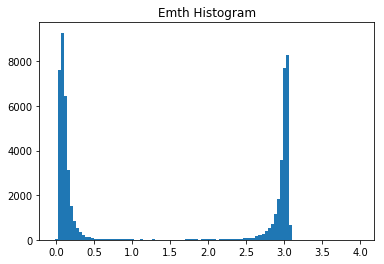

In [13]:
emth_rdd = selection.select("Emth").rdd
empty = hist.Bin(100, 0, 4, lambda x: x)
filled = emth_rdd.flatMap(lambda row: row[0]).aggregate(empty, hist.increment, hist.combine)
%matplotlib inline
filled.plot.matplotlib(name="Emth Histogram")

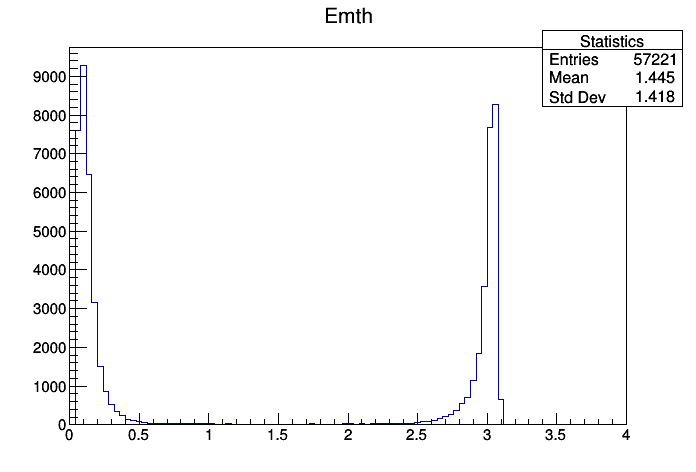

In [14]:
histogram2 = filled.plot.root("Statistics", "Emth")
d = ROOT.TCanvas("d")
histogram2.Draw()
d.Draw()

In [15]:
# Do cos(theta) histogram - apply function to RDD
emth_rdd.take(5)

[Row(Emth=[3.036165952682495, 0.20001855492591858, 0.1123889684677124]),
 Row(Emth=[3.018554925918579, 0.057119257748126984]),
 Row(Emth=[3.0526070594787598, 0.0831870511174202]),
 Row(Emth=[3.0720887184143066]),
 Row(Emth=[])]

# Operating on RDD's

In [16]:
# Define function to use cosine on theta rdd
def cos_theta(row):
    new_array = []
    for array in row:
        for item in array:
            new_array.append(cos(item))
    return new_array

In [17]:
emth_rdd.first()[0]

[3.036165952682495, 0.20001855492591858, 0.1123889684677124]

In [18]:
emth_rdd.first()[0][0]

3.036165952682495

In [19]:
cos_emth_rdd = emth_rdd.map(cos_theta)
cos_emth_rdd.take(5)

[[-0.9944477509003727, 0.9800628913778154, 0.9936910049699835],
 [-0.9924404026175052, 0.9983691386748126],
 [-0.9960433938987041, 0.9965419521189489],
 [-0.9975855736993198],
 []]

In [20]:
print type(emth_rdd)
print type(cos_emth_rdd)

<class 'pyspark.rdd.RDD'>
<class 'pyspark.rdd.PipelinedRDD'>


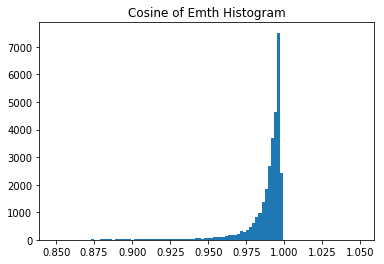

In [21]:
empty = hist.Bin(100, 0.85, 1.05, lambda x: x)
filled = cos_emth_rdd.flatMap(lambda row: row).aggregate(empty, hist.increment, hist.combine)
%matplotlib inline
filled.plot.matplotlib(name="Cosine of Emth Histogram")

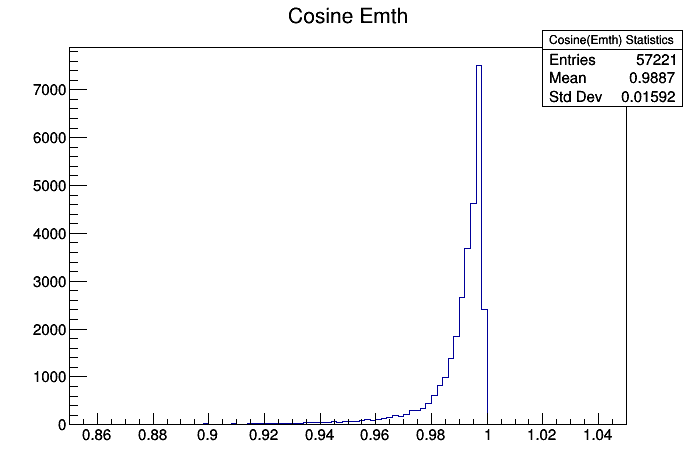

In [22]:
histogram3 = filled.plot.root("Cosine(Emth) Statistics", "Cosine Emth")
e = ROOT.TCanvas("e")
histogram3.Draw()
e.Draw()

# Calculating $Q^2$

In [23]:
emcalene_rdd = selection.select("Emcalene").rdd

def scale_mult(row):
    new_array = []
    for array in row:
        for item in array:
            new_array.append(item*4.0*27.5)
    return new_array    

coefficient_rdd = emcalene_rdd.map(scale_mult)

In [24]:
def angle_calc(row):
    new_array = []
    for array in row:
        for item in array:
            new_array.append((cos(item/2))**2)
    return new_array    

In [25]:
angle_rdd = emth_rdd.map(angle_calc)

In [26]:
emcalene_rdd.take(5)

[Row(Emcalene=[16.425640106201172, 5.845077991485596, 6.004647731781006]),
 Row(Emcalene=[5.145385265350342, 4.929872035980225]),
 Row(Emcalene=[19.95355987548828, 4.668456554412842]),
 Row(Emcalene=[6.739112377166748]),
 Row(Emcalene=[])]

In [27]:
coefficient_rdd.take(5)

[[1806.820411682129, 642.9585790634155, 660.5112504959106],
 [565.9923791885376, 542.2859239578247],
 [2194.891586303711, 513.5302209854126],
 [741.3023614883423],
 []]

In [28]:
emth_rdd.take(5)

[Row(Emth=[3.036165952682495, 0.20001855492591858, 0.1123889684677124]),
 Row(Emth=[3.018554925918579, 0.057119257748126984]),
 Row(Emth=[3.0526070594787598, 0.0831870511174202]),
 Row(Emth=[3.0720887184143066]),
 Row(Emth=[])]

In [29]:
angle_rdd.take(5)

[[0.0027761245498136118, 0.9900314456889077, 0.9968455024849918],
 [0.0037797986912474026, 0.9991845693374064],
 [0.0019783030506479713, 0.9982709760594745],
 [0.0012072131503401032],
 []]

In [30]:
#def rdd_mult(row):
#    new_array = []
#    index = 0
#    for item in array:
        # This next line cannot get to work - you must use rdd.take(num)[row index][element index]
        # no way to keep track of row indexes
        #new_array.append(item*angle_rdd_element)
#        index += 1
#    return new_array

In [31]:
#q2_rdd = coefficient_rdd
#q2_rdd = q2_rdd.map(rdd_mult)

In [32]:
#q2_rdd.take(5)

Possibly use reduceByKey, join, leftOuterJoin, union, functions

Then use withColumn function?

In [33]:
# Creates a list (Bad merging)
#operation_rdd = angle_rdd.union(coefficient_rdd).collect()

As far as I can tell, there is no way to multiply the elements of two RDD's together to make a third RDD.  Thus, I will go back to the dataframe and redo the operations to create a new column that is the calculation of Q^2.  This new column I will then make into an RDD.

In [34]:
#new_df = selection.withColumn('Q2', 4.0*27.5*selection.Emcalene*(cos(selection.Emth/2))**2)

Possibly create new blank columns, then modify then with map.  Maybe can create function that will split the lists and create a column solely of floats - but would be different length then original.

Thus, maybe create completely new dataframe with these "arrays" split into individual elements.

In [35]:
# Below is how to add a column solely with zeros - may or may not be useful

#from pyspark.sql.functions import lit
#new_df = selection.withColumn("Q2",lit(0))

## Attempting to Split Arrays

As stated above, splitting the arrays of the RDD's would create new RDD's with entries of floats (hopefully)

Then, the hope is to combine these two RDD's into a dataframe, and then use withColumn to multiply the two columns into a third column that is the calculation of $Q^2$.

### NOTE: This actually breaks.  split_array_vals only returns the first item from each array!!!

In [36]:
def split_array_vals(array):
    for item in array:
        return item

In [37]:
angle_split = angle_rdd.map(split_array_vals)
coef_split = coefficient_rdd.map(split_array_vals)

In [38]:
print type(angle_split)
print type(angle_rdd)
print type(coef_split)

<class 'pyspark.rdd.PipelinedRDD'>
<class 'pyspark.rdd.PipelinedRDD'>
<class 'pyspark.rdd.PipelinedRDD'>


In [39]:
# Can see that it only took 1st item from each array
angle_split.take(5)

[0.0027761245498136118,
 0.0037797986912474026,
 0.0019783030506479713,
 0.0012072131503401032,
 None]

In [40]:
# Can see that it only took 1st item from each array
coef_split.take(5)

[1806.820411682129,
 565.9923791885376,
 2194.891586303711,
 741.3023614883423,
 None]

In [41]:
#from pyspark.sql.types import StructType
#from pyspark.sql.types import StructField
#from pyspark.sql.types import StringType

#schema = StructType([StructField(str(i), StringType(), True) for i in range(32)])

#df = sqlContext.createDataFrame(new_df, schema)

In [42]:
#df.show()

## RDD with multiple columns

In [43]:
combined = selection.select("Emcalene","Emth").rdd
combined.take(5)

[Row(Emcalene=[16.425640106201172, 5.845077991485596, 6.004647731781006], Emth=[3.036165952682495, 0.20001855492591858, 0.1123889684677124]),
 Row(Emcalene=[5.145385265350342, 4.929872035980225], Emth=[3.018554925918579, 0.057119257748126984]),
 Row(Emcalene=[19.95355987548828, 4.668456554412842], Emth=[3.0526070594787598, 0.0831870511174202]),
 Row(Emcalene=[6.739112377166748], Emth=[3.0720887184143066]),
 Row(Emcalene=[], Emth=[])]

In [44]:
def testing(row):
    return (row[0],row[1])

In [45]:
test = combined.map(testing)
test.take(5)

[([16.425640106201172, 5.845077991485596, 6.004647731781006],
  [3.036165952682495, 0.20001855492591858, 0.1123889684677124]),
 ([5.145385265350342, 4.929872035980225],
  [3.018554925918579, 0.057119257748126984]),
 ([19.95355987548828, 4.668456554412842],
  [3.0526070594787598, 0.0831870511174202]),
 ([6.739112377166748], [3.0720887184143066]),
 ([], [])]

In [46]:
def match_pairs(row):
    array = []
    for x,y in zip(row[0],row[1]):
        array.append((x,y))
    return array

In [47]:
combined2 = combined.map(match_pairs)
combined2.take(5)

[[(16.425640106201172, 3.036165952682495),
  (5.845077991485596, 0.20001855492591858),
  (6.004647731781006, 0.1123889684677124)],
 [(5.145385265350342, 3.018554925918579),
  (4.929872035980225, 0.057119257748126984)],
 [(19.95355987548828, 3.0526070594787598),
  (4.668456554412842, 0.0831870511174202)],
 [(6.739112377166748, 3.0720887184143066)],
 []]

## Calculating $Q^2$ using pairs

In [48]:
def q_2(row):
    calcs = []
    for pair in row:
        q2 = 27.5*4*pair[0]*(cos(pair[1]/2))**2
        calcs.append(q2)
    return calcs

In [49]:
test = combined2.map(q_2)
test.take(5)

[[5.015958501975095, 636.5492115482391, 658.4276693975863],
 [2.139337254112838, 541.8437273875365],
 [4.342160721026197, 512.6423149391454],
 [0.8949099591668996],
 []]

In [50]:
# Flattening the results
test2 = test.flatMap(lambda x: x)
test2.take(10)

[5.015958501975095,
 636.5492115482391,
 658.4276693975863,
 2.139337254112838,
 541.8437273875365,
 4.342160721026197,
 512.6423149391454,
 0.8949099591668996,
 6.282757892117972,
 641.7099066150637]

In [51]:
test2.min()

0.09783406999141177

In [52]:
test2.max()

27489.788956300265

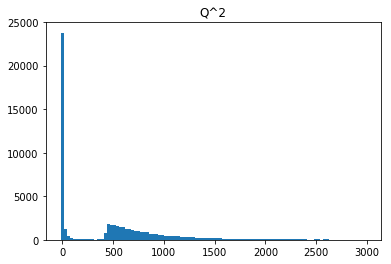

In [53]:
empty = hist.Bin(100, 0, 3000, lambda x: x)
filled = test2.aggregate(empty, hist.increment, hist.combine)
%matplotlib inline
filled.plot.matplotlib(name="Q^2")

In [54]:
emq2el = df.select("Emq2el").rdd
#emq2el.take(5)
q2flat = emq2el.flatMap(lambda x: x[0])
q2flat.take(10)

[6.209185600280762,
 696.8456420898438,
 725.750244140625,
 2.297110080718994,
 562.731201171875,
 4.466527938842773,
 540.8382568359375,
 0.9930397868156433,
 6.8785529136657715,
 684.3646240234375]

In [55]:
points = test2.zip(q2flat)
points.take(5)

[(5.015958501975095, 6.209185600280762),
 (636.5492115482391, 696.8456420898438),
 (658.4276693975863, 725.750244140625),
 (2.139337254112838, 2.297110080718994),
 (541.8437273875365, 562.731201171875)]

In [56]:
print type(points)

<class 'pyspark.rdd.RDD'>


In [57]:
# Needs to be fed x and y values separately inside scatter command...but RDD not iterable 
#plt.scatter(points)

Could not figure out how to make scatterplot with RDD - Viktor said to use DataFrames

# RDD's are not as Efficient as DataFrames

## Try to do the same with a DataFrame

In [58]:
data = df.select("Emcalene","Emth","Emq2el")
data.show(5)

+--------------------+--------------------+--------------------+
|            Emcalene|                Emth|              Emq2el|
+--------------------+--------------------+--------------------+
|[16.42564, 5.8450...|[3.036166, 0.2000...|[6.2091856, 696.8...|
|[5.1453853, 4.929...|[3.018555, 0.0571...| [2.29711, 562.7312]|
|[19.95356, 4.6684...|[3.052607, 0.0831...|[4.466528, 540.83...|
|         [6.7391124]|         [3.0720887]|         [0.9930398]|
|                  []|                  []|                  []|
+--------------------+--------------------+--------------------+
only showing top 5 rows



In [59]:
#data2 = data.withColumn("q2",4*27.5*data.Emcalene*(cos(data.Emth/2))**2)

In [60]:
#data2 = data.explode(data.Emcalene)

In [61]:
from pyspark.sql import Row
eDF = spark.createDataFrame([Row(a=1, intlist=[1,2,3], mapfield={"a": "b"})])
eDF.show()

+---+---------+-----------+
|  a|  intlist|   mapfield|
+---+---------+-----------+
|  1|[1, 2, 3]|Map(a -> b)|
+---+---------+-----------+



In [62]:
from pyspark.sql.functions import explode
eDF.select(explode(eDF.intlist).alias("anInt")).show()

+-----+
|anInt|
+-----+
|    1|
|    2|
|    3|
+-----+



In [63]:
#emcal = data.select(explode(data.Emcalene))
#print type(emcal)
#print type(emcal.col)
#data2 = data.withColumn("Emcal",emcal.col)

In [64]:
from pyspark.sql.functions import udf

In [65]:
#def explode_data(row):
#    return explode(row)

#udfExplode = udf(explode_data,FloatType())

In [66]:
#def match_pairs_dataframe(row):
#    array = []
#    for x,y in row[0],row[1]:
#        for e1,e2 in zip(x,y):
#            array.append((e1,e2))
#    return array

In [67]:
#udfmatch = udf(match_pairs_dataframe)
#data2 = udfmatch(data)

# Converting RDD to DataFrame

In [68]:
from pyspark.sql.types import Row

#here you are going to create a function
def f(x):
    d = {}
    for i in range(len(x)):
        d[str(i)] = x[i]
    return d

#Now populate that
data2 = points.map(lambda x: Row(**f(x))).toDF()

In [69]:
data2.show()

+------------------+------------------+
|                 0|                 1|
+------------------+------------------+
| 5.015958501975095| 6.209185600280762|
| 636.5492115482391| 696.8456420898438|
| 658.4276693975863|  725.750244140625|
| 2.139337254112838| 2.297110080718994|
| 541.8437273875365|  562.731201171875|
| 4.342160721026197| 4.466527938842773|
| 512.6423149391454| 540.8382568359375|
|0.8949099591668996|0.9930397868156433|
| 6.282757892117972|6.8785529136657715|
| 641.7099066150637| 684.3646240234375|
|20.141258127207557|20.308908462524414|
| 6.280400072171342| 6.680352210998535|
| 514.2568237252826|    595.4931640625|
| 990.5260859626181|  974.857177734375|
| 3.904656723264059|   4.0141921043396|
| 897.0965581679836| 938.6382446289062|
| 5.588391556624824| 6.169318675994873|
|1.5749015365931887|1.6244956254959106|
|1.4494526920576092|1.5254446268081665|
| 664.8928103030667|  717.348388671875|
+------------------+------------------+
only showing top 20 rows



## Renaming Columns

In [70]:
print type(data2)
data2.schema.names

['0', '1']

<class 'pyspark.sql.dataframe.DataFrame'>


In [71]:
from pyspark.sql.functions import *

Q_data = data2.select(col("0").alias("Q2Calc"), col("1").alias("EmQ2"))
Q_data.show()

+------------------+------------------+
|            Q2Calc|              EmQ2|
+------------------+------------------+
| 5.015958501975095| 6.209185600280762|
| 636.5492115482391| 696.8456420898438|
| 658.4276693975863|  725.750244140625|
| 2.139337254112838| 2.297110080718994|
| 541.8437273875365|  562.731201171875|
| 4.342160721026197| 4.466527938842773|
| 512.6423149391454| 540.8382568359375|
|0.8949099591668996|0.9930397868156433|
| 6.282757892117972|6.8785529136657715|
| 641.7099066150637| 684.3646240234375|
|20.141258127207557|20.308908462524414|
| 6.280400072171342| 6.680352210998535|
| 514.2568237252826|    595.4931640625|
| 990.5260859626181|  974.857177734375|
| 3.904656723264059|   4.0141921043396|
| 897.0965581679836| 938.6382446289062|
| 5.588391556624824| 6.169318675994873|
|1.5749015365931887|1.6244956254959106|
|1.4494526920576092|1.5254446268081665|
| 664.8928103030667|  717.348388671875|
+------------------+------------------+
only showing top 20 rows



## Converting to sampled array for plotting

In [72]:
Q_array = Q_data.select("Q2Calc","EmQ2").collect()
print Q_array[0]
print Q_array[0][0]
print type(Q_array)

Row(Q2Calc=5.015958501975095, EmQ2=6.209185600280762)
5.01595850198
<type 'list'>


In [73]:
Q_sample = Q_data.sample(False, 0.01, 42).collect()
print Q_sample[0:50]

[Row(Q2Calc=6.177512916080762, EmQ2=6.462905406951904), Row(Q2Calc=1995.0282049102013, EmQ2=2072.15283203125), Row(Q2Calc=465.0329821796536, EmQ2=544.9459228515625), Row(Q2Calc=2.600013178544931, EmQ2=2.7610650062561035), Row(Q2Calc=1474.9558113140931, EmQ2=1535.950439453125), Row(Q2Calc=630.645724057192, EmQ2=650.10888671875), Row(Q2Calc=3.472876148005181, EmQ2=3.973836660385132), Row(Q2Calc=581.5881293445583, EmQ2=643.3831787109375), Row(Q2Calc=7.645957943116343, EmQ2=7.924780368804932), Row(Q2Calc=5.708157028693215, EmQ2=6.106612205505371), Row(Q2Calc=1844.9850245519829, EmQ2=1936.0335693359375), Row(Q2Calc=8.257929934141126, EmQ2=9.417142868041992), Row(Q2Calc=30.530020741041305, EmQ2=32.439327239990234), Row(Q2Calc=645.7910624719531, EmQ2=674.0447998046875), Row(Q2Calc=612.9218328591795, EmQ2=685.043212890625), Row(Q2Calc=1.8683242888760538, EmQ2=1.9345570802688599), Row(Q2Calc=24.61662170203158, EmQ2=26.442930221557617), Row(Q2Calc=485.05574365028957, EmQ2=503.51934814453125), Ro

## Plotting Scatterplot

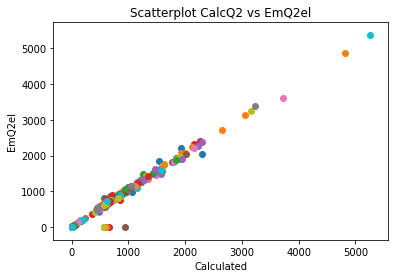

In [74]:
for row in Q_sample:
    x = row[0]
    y = row[1]
    plt.scatter(x,y)

plt.title('Scatterplot CalcQ2 vs EmQ2el')
plt.xlabel('Calculated')
plt.ylabel('EmQ2el')   
plt.show()

# Filter Data with Emprob

In [75]:
# For some reason fails when try to use df.select("Emprob", "Emncand")
numCand = df.select("Emncand")
print type(numCand)
numCand.show()
df.select("Emprob").show()

<class 'pyspark.sql.dataframe.DataFrame'>
+-------+
|Emncand|
+-------+
|      3|
|      2|
|      2|
|      1|
|      0|
|      2|
|      1|
|      0|
|      3|
|      1|
|      1|
|      1|
|      2|
|      1|
|      0|
|      1|
|      1|
|      0|
|      0|
|      1|
+-------+
only showing top 20 rows

+--------------------+
|              Emprob|
+--------------------+
|[0.08723083, 0.25...|
|[0.939351, 0.2585...|
|[0.037284255, 0.0...|
|        [0.55371076]|
|                  []|
|[0.48681435, 0.00...|
|        [0.92922276]|
|                  []|
|[0.93522364, 0.02...|
|         [0.9350373]|
|       [3.645794E-5]|
|         [0.3580788]|
|[0.73354083, 0.43...|
|        [0.06654061]|
|                  []|
|        [0.46746105]|
|         [0.0053049]|
|                  []|
|                  []|
|        [0.93110394]|
+--------------------+
only showing top 20 rows



In [76]:
# testing explode
dfa = sqlContext.createDataFrame([Row(a=1, b=[1,2,3],c=[7,8,9]), Row(a=2, b=[4,5,6],c=[10,11,12])])
dfb = dfa.select(dfa.a,explode(dfa.b).alias("b_row"),dfa.c)
dfc = dfb.select(dfb.a,dfb.b_row,explode(dfb.c).alias("c_row"))

In [77]:
# testing explode - it does cartesian product - I only want to map elements of same index of arrays together
dfa.show()
dfb.show()
dfc.show()

+---+---------+------------+
|  a|        b|           c|
+---+---------+------------+
|  1|[1, 2, 3]|   [7, 8, 9]|
|  2|[4, 5, 6]|[10, 11, 12]|
+---+---------+------------+

+---+-----+------------+
|  a|b_row|           c|
+---+-----+------------+
|  1|    1|   [7, 8, 9]|
|  1|    2|   [7, 8, 9]|
|  1|    3|   [7, 8, 9]|
|  2|    4|[10, 11, 12]|
|  2|    5|[10, 11, 12]|
|  2|    6|[10, 11, 12]|
+---+-----+------------+

+---+-----+-----+
|  a|b_row|c_row|
+---+-----+-----+
|  1|    1|    7|
|  1|    1|    8|
|  1|    1|    9|
|  1|    2|    7|
|  1|    2|    8|
|  1|    2|    9|
|  1|    3|    7|
|  1|    3|    8|
|  1|    3|    9|
|  2|    4|   10|
|  2|    4|   11|
|  2|    4|   12|
|  2|    5|   10|
|  2|    5|   11|
|  2|    5|   12|
|  2|    6|   10|
|  2|    6|   11|
|  2|    6|   12|
+---+-----+-----+



In [78]:
#filter_data = df.select("Emprob","Emcalene","Emth").join(Q_data,["CalcQ2","EmQ2el"],"outer")
start = df.select("Emprob","Emcalene","Emth").rdd
start.take(5)

[Row(Emprob=[0.08723083138465881, 0.25005948543548584, 0.2125348299741745], Emcalene=[16.425640106201172, 5.845077991485596, 6.004647731781006], Emth=[3.036165952682495, 0.20001855492591858, 0.1123889684677124]),
 Row(Emprob=[0.9393510222434998, 0.258521169424057], Emcalene=[5.145385265350342, 4.929872035980225], Emth=[3.018554925918579, 0.057119257748126984]),
 Row(Emprob=[0.037284255027770996, 0.0028328464832156897], Emcalene=[19.95355987548828, 4.668456554412842], Emth=[3.0526070594787598, 0.0831870511174202]),
 Row(Emprob=[0.5537107586860657], Emcalene=[6.739112377166748], Emth=[3.0720887184143066]),
 Row(Emprob=[], Emcalene=[], Emth=[])]

In [79]:
def match_trips(row):
    array = []
    for a,b,c in zip(row[0],row[1],row[2]):
        array.append((a,b,c))
    return array

In [80]:
flatStart = start.flatMap(match_trips)
flatStart.take(10)

[(0.08723083138465881, 16.425640106201172, 3.036165952682495),
 (0.25005948543548584, 5.845077991485596, 0.20001855492591858),
 (0.2125348299741745, 6.004647731781006, 0.1123889684677124),
 (0.9393510222434998, 5.145385265350342, 3.018554925918579),
 (0.258521169424057, 4.929872035980225, 0.057119257748126984),
 (0.037284255027770996, 19.95355987548828, 3.0526070594787598),
 (0.0028328464832156897, 4.668456554412842, 0.0831870511174202),
 (0.5537107586860657, 6.739112377166748, 3.0720887184143066),
 (0.48681434988975525, 7.086331367492676, 2.9617953300476074),
 (0.0012921133311465383, 5.864682197570801, 0.1454324722290039)]

In [81]:
filter_data = flatStart.map(lambda x: Row(**f(x))).toDF()
filter_data.show()

+--------------------+------------------+--------------------+
|                   0|                 1|                   2|
+--------------------+------------------+--------------------+
| 0.08723083138465881|16.425640106201172|   3.036165952682495|
| 0.25005948543548584| 5.845077991485596| 0.20001855492591858|
|  0.2125348299741745| 6.004647731781006|  0.1123889684677124|
|  0.9393510222434998| 5.145385265350342|   3.018554925918579|
|   0.258521169424057| 4.929872035980225|0.057119257748126984|
|0.037284255027770996| 19.95355987548828|  3.0526070594787598|
|0.002832846483215...| 4.668456554412842|  0.0831870511174202|
|  0.5537107586860657| 6.739112377166748|  3.0720887184143066|
| 0.48681434988975525| 7.086331367492676|  2.9617953300476074|
|0.001292113331146...| 5.864682197570801|  0.1454324722290039|
|  0.9292227625846863|27.946359634399414|   2.979527473449707|
|  0.9352236390113831|22.427814483642578|   3.040639877319336|
|0.026606209576129913| 4.715088367462158| 0.18453313410

In [82]:
filter_data = filter_data.select(col("0").alias("Emprob"), col("1").alias("Emcalene"), col("2").alias("Emth"))
filter_data.show()

+--------------------+------------------+--------------------+
|              Emprob|          Emcalene|                Emth|
+--------------------+------------------+--------------------+
| 0.08723083138465881|16.425640106201172|   3.036165952682495|
| 0.25005948543548584| 5.845077991485596| 0.20001855492591858|
|  0.2125348299741745| 6.004647731781006|  0.1123889684677124|
|  0.9393510222434998| 5.145385265350342|   3.018554925918579|
|   0.258521169424057| 4.929872035980225|0.057119257748126984|
|0.037284255027770996| 19.95355987548828|  3.0526070594787598|
|0.002832846483215...| 4.668456554412842|  0.0831870511174202|
|  0.5537107586860657| 6.739112377166748|  3.0720887184143066|
| 0.48681434988975525| 7.086331367492676|  2.9617953300476074|
|0.001292113331146...| 5.864682197570801|  0.1454324722290039|
|  0.9292227625846863|27.946359634399414|   2.979527473449707|
|  0.9352236390113831|22.427814483642578|   3.040639877319336|
|0.026606209576129913| 4.715088367462158| 0.18453313410

In [83]:
#from pyspark.sql.window import Window
#from pyspark.sql.functions import row_number
#w = Window().orderBy()
#to_join_1= filter_data.withColumn("rowNum", row_number().over(w))
#to_join_1.show()

In [84]:
#joined = filter_data.join(Q_data)
#joined.show()

In [85]:
from pyspark.sql.functions import monotonically_increasing_id

# This will return a new DF with all the columns + id
ids = monotonically_increasing_id()
filter_ids = filter_data.withColumn("id", ids)
filter_ids.show()

+--------------------+------------------+--------------------+-----------+
|              Emprob|          Emcalene|                Emth|         id|
+--------------------+------------------+--------------------+-----------+
| 0.08723083138465881|16.425640106201172|   3.036165952682495|60129542144|
| 0.25005948543548584| 5.845077991485596| 0.20001855492591858|60129542145|
|  0.2125348299741745| 6.004647731781006|  0.1123889684677124|60129542146|
|  0.9393510222434998| 5.145385265350342|   3.018554925918579|60129542147|
|   0.258521169424057| 4.929872035980225|0.057119257748126984|60129542148|
|0.037284255027770996| 19.95355987548828|  3.0526070594787598|60129542149|
|0.002832846483215...| 4.668456554412842|  0.0831870511174202|60129542150|
|  0.5537107586860657| 6.739112377166748|  3.0720887184143066|60129542151|
| 0.48681434988975525| 7.086331367492676|  2.9617953300476074|60129542152|
|0.001292113331146...| 5.864682197570801|  0.1454324722290039|60129542153|
|  0.9292227625846863|27.

In [86]:
Q_ids = Q_data.withColumn("id",ids)
Q_ids.show()

+------------------+------------------+-----------+
|            Q2Calc|              EmQ2|         id|
+------------------+------------------+-----------+
| 5.015958501975095| 6.209185600280762|60129542144|
| 636.5492115482391| 696.8456420898438|60129542145|
| 658.4276693975863|  725.750244140625|60129542146|
| 2.139337254112838| 2.297110080718994|60129542147|
| 541.8437273875365|  562.731201171875|60129542148|
| 4.342160721026197| 4.466527938842773|60129542149|
| 512.6423149391454| 540.8382568359375|60129542150|
|0.8949099591668996|0.9930397868156433|60129542151|
| 6.282757892117972|6.8785529136657715|60129542152|
| 641.7099066150637| 684.3646240234375|60129542153|
|20.141258127207557|20.308908462524414|60129542154|
| 6.280400072171342| 6.680352210998535|60129542155|
| 514.2568237252826|    595.4931640625|60129542156|
| 990.5260859626181|  974.857177734375|60129542157|
| 3.904656723264059|   4.0141921043396|60129542158|
| 897.0965581679836| 938.6382446289062|60129542159|
| 5.58839155

In [87]:
joined = filter_ids.join(Q_ids, "id", "outer")
joined.show()

+-----------+--------------------+------------------+-------------------+------------------+------------------+
|         id|              Emprob|          Emcalene|               Emth|            Q2Calc|              EmQ2|
+-----------+--------------------+------------------+-------------------+------------------+------------------+
|60129542213|1.689303417151677...| 6.195012092590332|0.09428342431783676|    679.9380344553| 707.6766357421875|
|60129542543|3.597602772060781...| 5.436313629150391|0.13280488550662994| 595.3616444710729| 681.2945556640625|
|60129542564|2.299294283147901...|10.160087585449219| 0.3243769705295563|1088.4676733096858|1103.4119873046875|
|60129542797|  0.9305214881896973|15.990128517150879| 3.0740697383880615|2.0041120614851002| 2.114215135574341|
|60129543004|2.514538437026203...| 7.244929313659668| 0.1190977469086647| 794.1195517507515| 846.7213134765625|
|60129543145|1.255470942851388...| 8.112351417541504| 0.1820245087146759| 884.9874298273046| 955.1446533

In [88]:
# just checking to make sure things didn't get screwed up
# output from show sometimes looks wrong because of processes distribution, but is not

filter_data.describe(["Emprob"]).show()

+-------+--------------------+
|summary|              Emprob|
+-------+--------------------+
|  count|               57221|
|   mean|   0.266209054781405|
| stddev|  0.3650102337103936|
|    min|2.585945530550872...|
|    max|  0.9993994832038879|
+-------+--------------------+



In [89]:
joined.describe(["Emprob"]).show()

+-------+--------------------+
|summary|              Emprob|
+-------+--------------------+
|  count|               57221|
|   mean| 0.26620905478140416|
| stddev|  0.3650102337103948|
|    min|2.585945530550872...|
|    max|  0.9993994832038879|
+-------+--------------------+



## Choosing breakpoint for Emprob

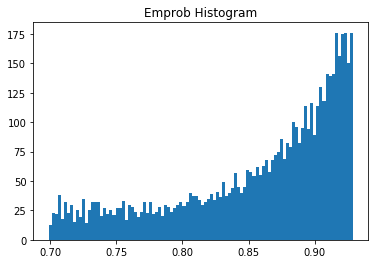

In [90]:
emprob_rdd = joined.select("Emprob").rdd
empty = hist.Bin(100, 0.7, 0.93, lambda x: x)
filled = emprob_rdd.flatMap(lambda row: row).aggregate(empty, hist.increment, hist.combine)
%matplotlib inline
filled.plot.matplotlib(name="Emprob Histogram")

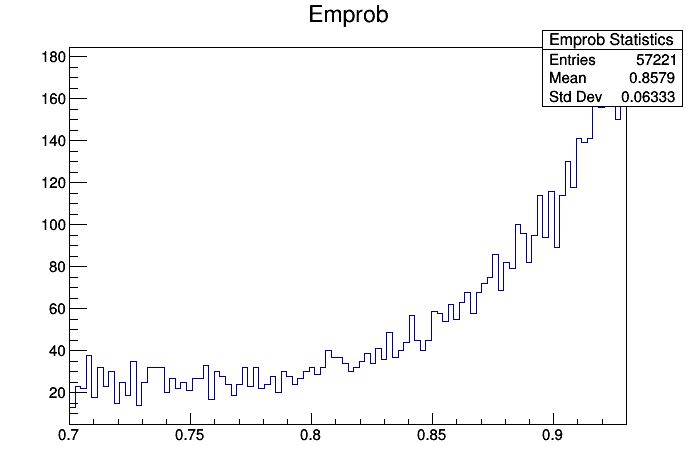

In [91]:
histogram4 = filled.plot.root("Emprob Statistics", "Emprob")
f = ROOT.TCanvas("f")
histogram4.Draw()
f.Draw()

It appears after messing with the range of the histogram and looking at several plots that a decent cut-off would be to filter out data where Emprob < 0.8.

In [92]:
filter_joined = joined.filter(joined.Emprob>=0.8)
filter_joined.show()

+-----------+------------------+------------------+-------------------+------------------+------------------+
|         id|            Emprob|          Emcalene|               Emth|            Q2Calc|              EmQ2|
+-----------+------------------+------------------+-------------------+------------------+------------------+
|60129542797|0.9305214881896973|15.990128517150879| 3.0740697383880615|2.0041120614851002| 2.114215135574341|
|60129543980| 0.881237804889679|27.114118576049805| 2.9842419624328613|18.423377153419853|19.296489715576172|
|60129544479|0.9350373148918152|17.679519653320312| 3.0441126823425293| 4.616257340984358|4.7738823890686035|
|60129544699|0.8855631947517395|10.489485740661621|0.10008543729782104| 1150.956302986092| 1207.801513671875|
|60129548228|0.9366582036018372|14.011285781860352| 3.0530478954315186|3.0189271515906526| 3.080789804458618|
|60129548710| 0.914371132850647|20.012554168701172| 3.0134902000427246| 9.018952973505371| 9.216503143310547|
|601295499

In [93]:
filter_joined.count()

11507

## Creating Scatterplot of Sample

In [94]:
filter_sample = filter_joined.select("Q2Calc","EmQ2").sample(False, 0.4, 72).collect()
print filter_sample[0:10]

[Row(Q2Calc=2.0041120614851002, EmQ2=2.114215135574341), Row(Q2Calc=3.0189271515906526, EmQ2=3.080789804458618), Row(Q2Calc=53.374075510008595, EmQ2=55.179561614990234), Row(Q2Calc=4.235756816437403, EmQ2=4.338635444641113), Row(Q2Calc=3.5368869700085543, EmQ2=3.7793610095977783), Row(Q2Calc=2.510247143895809, EmQ2=2.567662477493286), Row(Q2Calc=531.8646154362928, EmQ2=559.0379028320312), Row(Q2Calc=4.920299464458185, EmQ2=5.055008888244629), Row(Q2Calc=10.321160155629348, EmQ2=10.694759368896484), Row(Q2Calc=765.8908285670584, EmQ2=848.932861328125)]


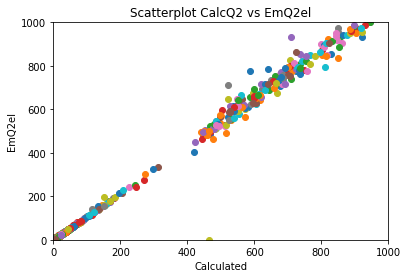

In [95]:
plt.gcf().clear()
for row in filter_sample:
    x = row[0]
    y = row[1]
    plt.scatter(x,y)

plt.title('Scatterplot CalcQ2 vs EmQ2el')
plt.xlabel('Calculated')
plt.ylabel('EmQ2el')
plt.xlim([0,1000])
plt.ylim([0,1000])
plt.show()

## Outlier Analysis

In [96]:
filter_joined.filter((filter_joined.Q2Calc > 400) & (filter_joined.EmQ2 < 100)).show()

+-----------+------------------+------------------+--------------------+------------------+----+
|         id|            Emprob|          Emcalene|                Emth|            Q2Calc|EmQ2|
+-----------+------------------+------------------+--------------------+------------------+----+
|60129587303|0.9400754570960999| 4.423179626464844|  0.1598960906267166|483.44650384914735| 0.0|
|60129584727| 0.991905689239502| 4.223057746887207|0.055995743721723557| 464.1723061546939| 0.0|
|60129565957|0.9245891571044922|22.158838272094727|  0.1400543451309204|2425.5388472099094| 0.0|
+-----------+------------------+------------------+--------------------+------------------+----+



In [97]:
filter_joined.filter((filter_joined.Q2Calc > 100) & (filter_joined.EmQ2 < 10)).show()

+-----------+------------------+------------------+--------------------+------------------+----+
|         id|            Emprob|          Emcalene|                Emth|            Q2Calc|EmQ2|
+-----------+------------------+------------------+--------------------+------------------+----+
|60129587303|0.9400754570960999| 4.423179626464844|  0.1598960906267166|483.44650384914735| 0.0|
|60129584727| 0.991905689239502| 4.223057746887207|0.055995743721723557| 464.1723061546939| 0.0|
|60129565957|0.9245891571044922|22.158838272094727|  0.1400543451309204|2425.5388472099094| 0.0|
+-----------+------------------+------------------+--------------------+------------------+----+



In [98]:
filter_joined.describe(["Q2Calc"]).show()

+-------+------------------+
|summary|            Q2Calc|
+-------+------------------+
|  count|             11507|
|   mean|61.343586670778734|
| stddev|327.94960238621445|
|    min| 0.174485489970516|
|    max|  26412.7052325698|
+-------+------------------+



In [99]:
filter_joined.describe(["EmQ2"]).show()

+-------+-----------------+
|summary|             EmQ2|
+-------+-----------------+
|  count|            11507|
|   mean|67.82115276649684|
| stddev|538.4312967895788|
|    min|              0.0|
|    max|    52075.1015625|
+-------+-----------------+



In [100]:
filter_joined.filter(filter_joined.EmQ2 > 4000).show()

+-----------+------------------+------------------+-------------------+-----------------+----------------+
|         id|            Emprob|          Emcalene|               Emth|           Q2Calc|            EmQ2|
+-----------+------------------+------------------+-------------------+-----------------+----------------+
|60129570677|0.8712858557701111| 43.58793258666992|0.05864917114377022|  4790.5506771364| 4858.6201171875|
|60129579965|0.8390766978263855|240.25807189941406|0.04872453585267067| 26412.7052325698|   52075.1015625|
|60129567131|0.9405015110969543| 25.22752571105957|0.15457183122634888|2758.485250386904|4968.45849609375|
+-----------+------------------+------------------+-------------------+-----------------+----------------+



In [101]:
filter_joined.filter(filter_joined.EmQ2 > 2500).show()

+-----------+------------------+------------------+--------------------+------------------+-----------------+
|         id|            Emprob|          Emcalene|                Emth|            Q2Calc|             EmQ2|
+-----------+------------------+------------------+--------------------+------------------+-----------------+
|60129570677|0.8712858557701111| 43.58793258666992| 0.05864917114377022|   4790.5506771364|  4858.6201171875|
|60129578956|0.9827548265457153|   24.976806640625|0.058186180889606476|2745.1239241490207| 2804.74462890625|
|60129555730|0.8387942314147949|25.281414031982422|0.061714041978120804|2778.3084810212094|2810.093505859375|
|60129581907|0.8724992275238037| 23.03304100036621| 0.18084946274757385|2512.9743153928366| 3545.06689453125|
|60129579965|0.8390766978263855|240.25807189941406| 0.04872453585267067|  26412.7052325698|    52075.1015625|
|60129575373|0.9894064664840698| 34.11053466796875| 0.05696582421660423| 3749.115599120347| 3881.01904296875|
|601295671

Think that should at least take out entry id 60129579965, which has Emprob = 0.839 and insanely high $Q^2$ values.  Q2Calc = 26,412 and EmQ2 = 52,075.

In [102]:
print filter_joined.count()
filter_joined = filter_joined.filter(filter_joined.EmQ2 < 5000)
# Check to make sure took out correct item and only that item
print filter_joined.count()
filter_joined.filter(filter_joined.EmQ2 > 4000).show()

11507
11506
+-----------+------------------+-----------------+-------------------+-----------------+----------------+
|         id|            Emprob|         Emcalene|               Emth|           Q2Calc|            EmQ2|
+-----------+------------------+-----------------+-------------------+-----------------+----------------+
|60129570677|0.8712858557701111|43.58793258666992|0.05864917114377022|  4790.5506771364| 4858.6201171875|
|60129567131|0.9405015110969543|25.22752571105957|0.15457183122634888|2758.485250386904|4968.45849609375|
+-----------+------------------+-----------------+-------------------+-----------------+----------------+



# Runtime Calculation (On my Laptop)

In [103]:
print "--- %s seconds ---" % (time.time() - start_time)

--- 88.3103880882 seconds ---
